In [307]:
#Getting necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import scipy.stats as ss
from scipy.stats import chi2_contingency

In [308]:
#getting the dataset with only columns of interest
Lg = pd.read_csv(r'C:/Users/Ernest/Desktop/Josphine/Lg_transformed.csv',usecols=
      ['form', 'reported','patient_age_in_months','patient_coughs',
       'patient_diarrhea','patient_fever','danger_signs','danger_signs2',
       'diagnosis_cough','diagnosis_diarrhea','diagnosis_fever',
       'coughing_duration','fever_duration',
       'patient_temperature','mrdt_result','treatment_follow_up',
       'referral_follow_up','gave_ors','gave_zinc','gave_al','al_pack',
       'gave_paracetamol','treat_for_malaria','muac_score','fast_breathing',
       'diarrhea_blood','has_edema_indentation','follow_up','patient_improved_1',
       'patient_health_facility_visit','how_water_treated','llin','education',
       'national_quintile','urban_quintile', 'Under5', 'over5'],low_memory=False)

In [447]:
Lg.head(3)

,form,reported,patient_age_in_months,patient_coughs,patient_diarrhea,patient_fever,danger_signs,danger_signs2,diagnosis_cough,diagnosis_diarrhea,...,follow_up,patient_improved_1,patient_health_facility_visit,how_water_treated,llin,education,national_quintile,urban_quintile,Under5,over5
0,assessment_endemic,2022-04-22 18:45:06,22.0,no,no,yes,convulsions,Convulsions,cough1,diarrhea1,...,[NULL],[NULL],[NULL],aqua_tabs,no,some_primary,2.0,1.0,1.0,1.0
1,assessment_endemic,2022-04-20 17:08:06,58.0,no,no,yes,convulsions,Convulsions,cough1,diarrhea1,...,yes,[NULL],no_facility,aqua_tabs,no,some_primary,2.0,1.0,1.0,1.0
2,assessment_endemic,2022-04-20 17:14:41,22.0,yes,no,no,convulsions,Convulsions,cough1,diarrhea1,...,[NULL],[NULL],[NULL],aqua_tabs,no,some_primary,2.0,1.0,1.0,1.0


Calculating percentage of patients with each risk factor

In [311]:
#fast breathing patient
fast_breathing_column=Lg[Lg.fast_breathing != '[NULL]']
fast_breathing_percent = fast_breathing_column['fast_breathing'].value_counts()
fast_breathing_percent


False    17117
True      3065
Name: fast_breathing, dtype: int64

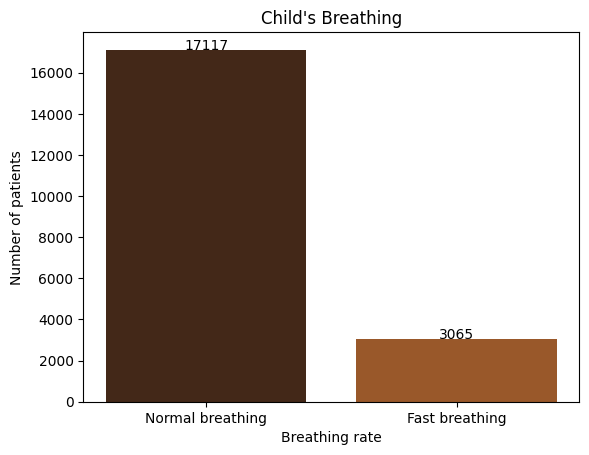

In [429]:
labels=['Normal breathing','Fast breathing']
values=fast_breathing_percent
plt.title("Child's Breathing")
plt.xlabel("Breathing rate")
plt.ylabel("Number of patients")
plt.bar(labels,values,color=('#432818','#99582a'))
for i, v in enumerate(values):
    plt.text(i,v,str(v),ha='center')

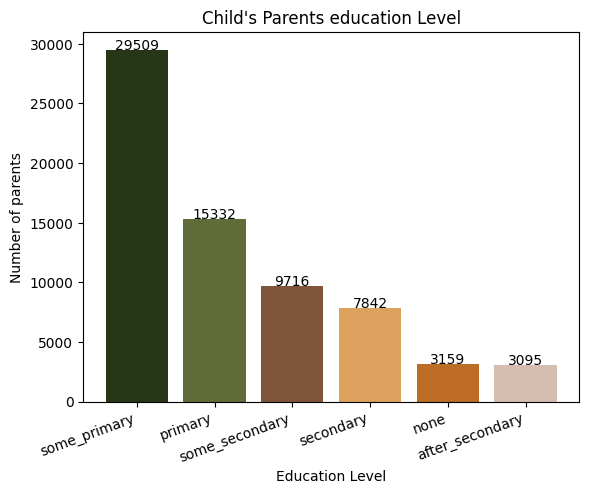

In [446]:
#Patients parents education
Lg.education.value_counts()
values=Lg.education.value_counts()
labels=['some_primary','primary','some_secondary','secondary','none','after_secondary']
plt.title("Child's Parents education Level")
plt.ylabel("Number of parents")
plt.xlabel("Education Level")
plt.xticks(rotation = 20, ha='right')
plt.bar(labels,values,color=('#283618','#606c38','#7f5539','#dda15e','#bc6c25','#d5bdaf'))
for i, v in enumerate(values):
    plt.text(i,v,str(v),ha='center') 

In [359]:
Lg.education.value_counts()

some_primary       29509
primary            15332
some_secondary      9716
secondary           7842
none                3159
after_secondary     3095
Name: education, dtype: int64

In [367]:
#checking to see the orientation of the data with regards to columns and rows
Lg.head(3)

,form,reported,patient_age_in_months,patient_coughs,patient_diarrhea,patient_fever,danger_signs,danger_signs2,diagnosis_cough,diagnosis_diarrhea,...,follow_up,patient_improved_1,patient_health_facility_visit,how_water_treated,llin,education,national_quintile,urban_quintile,Under5,over5
0,assessment_endemic,2022-04-22 18:45:06,22.0,no,no,yes,convulsions,Convulsions,cough1,diarrhea1,...,[NULL],[NULL],[NULL],aqua_tabs,no,some_primary,2.0,1.0,1.0,1.0
1,assessment_endemic,2022-04-20 17:08:06,58.0,no,no,yes,convulsions,Convulsions,cough1,diarrhea1,...,yes,[NULL],no_facility,aqua_tabs,no,some_primary,2.0,1.0,1.0,1.0
2,assessment_endemic,2022-04-20 17:14:41,22.0,yes,no,no,convulsions,Convulsions,cough1,diarrhea1,...,[NULL],[NULL],[NULL],aqua_tabs,no,some_primary,2.0,1.0,1.0,1.0


How many people received different treatments

In [452]:
treatment_cols = ['gave_zinc', 'gave_al', 'gave_paracetamol','gave_ors'] 
#Zinc treatment
zinc_column=Lg[Lg.gave_zinc != '[NULL]']
zinc = zinc_column['gave_zinc'].value_counts()
zinc[:1]

yes    8308
Name: gave_zinc, dtype: int64

In [347]:
#paracetamol treatment
paracetamol_column=Lg[Lg.gave_paracetamol != '[NULL]']
paracetamol = paracetamol_column['gave_paracetamol'].value_counts()
paracetamol[:1]

yes    35370
Name: gave_paracetamol, dtype: int64

In [348]:
 #al treatment
al_column=Lg[Lg.gave_al != '[NULL]']
al = al_column['gave_al'].value_counts()
al[:1]

yes    40758
Name: gave_al, dtype: int64

In [349]:
ors_column=Lg[Lg['gave_ors'] != '[NULL]']
ors = ors_column['gave_ors'].value_counts()
ors[:1]

yes    8304
Name: gave_ors, dtype: int64

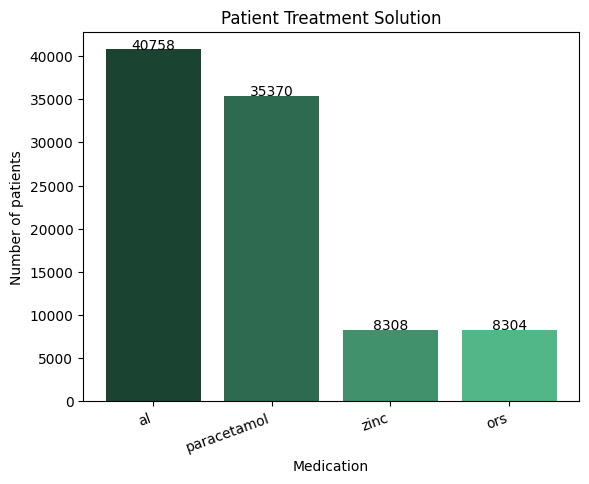

In [445]:
#most common treatment  solution
values=al[0],paracetamol[0],zinc[0],ors[0]
labels= ['al','paracetamol','zinc','ors']
plt.title("Patient Treatment Solution")
plt.ylabel("Number of patients")
plt.xlabel("Medication")
plt.xticks(rotation = 20, ha='right')
plt.bar(labels,values,color=('#1b4332','#2d6a4f','#40916c','#52b788'))
for i, v in enumerate(values):
    plt.text(i,v,str(v),ha='center')

In [373]:
#Muac score
Muac_column=Lg[Lg['muac_score'] !='[NULL]']
Muac_column=Muac_column[Muac_column['muac_score'] !='none']
Muac=Muac_column.muac_score.value_counts()
Muac

green     55265
yellow       37
red          15
Name: muac_score, dtype: int64

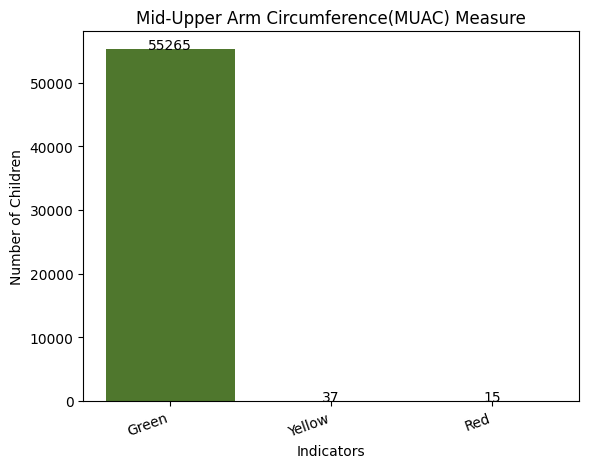

In [448]:
labels = ['Green','Yellow','Red']
values=Muac
plt.title("Mid-Upper Arm Circumference(MUAC) Measure")
plt.ylabel("Number of Children")
plt.xlabel("Indicators")
plt.xticks(rotation = 20, ha='right')
plt.bar(labels,values,color=('#4f772d','yellow','red'))
for i, v in enumerate(values):
    plt.text(i,v,str(v),ha='center')

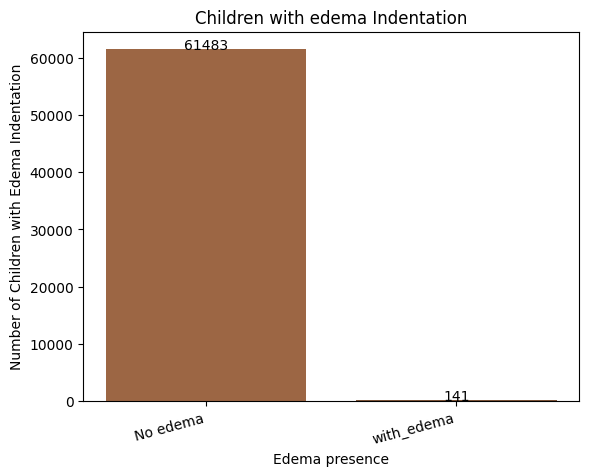

In [443]:
has_edema_indentation_column=Lg[Lg['has_edema_indentation'] !='[NULL]']
edema=has_edema_indentation_column.has_edema_indentation.value_counts()
values=has_edema_indentation_column.has_edema_indentation.value_counts()
labels=['No edema','with_edema']
plt.title("Children with edema Indentation")
plt.xlabel('Edema presence')
plt.ylabel('Number of Children with Edema Indentation')
plt.xticks(rotation=15,ha='right')
plt.bar(labels,values,color=('#9c6644','#7f5539'))
for i, v in enumerate(values):
    plt.text(i,v,str(v),ha='center')

In [439]:
#Total improved patients
patient_improved=Lg[Lg['patient_improved_1']!='[NULL]']
patient_improved=patient_improved.patient_improved_1.value_counts()
patient_improved

improved    40383
Name: patient_improved_1, dtype: int64

In [440]:
#getting quintiles to determine social demographics
national_quintile_column=Lg[Lg['national_quintile']!='[NULL]']
national_quintile=national_quintile_column.national_quintile.value_counts()
national_quintile

3.0    21174
4.0    19442
2.0    15283
5.0     9650
1.0     3104
Name: national_quintile, dtype: int64

Text(0.5, 1.0, 'Social Demographics')

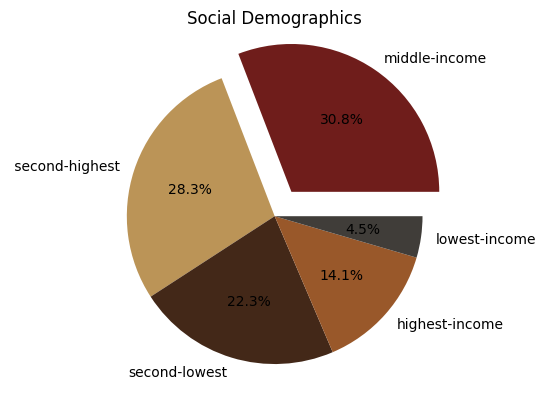

In [427]:
values=national_quintile
plt.pie(values,labels=['middle-income',' second-highest','second-lowest',
        'highest-income','lowest-income'],colors=['#6f1d1b','#bb9457',
        '#432818','#99582a','#403d39'],autopct="%2.1f%%",explode=[0.2,0,0,0,0])
plt.title("Social Demographics")
#plt.legend(title=("Stratification"),loc=('upper left'))
#pallete-'#606c38','#283618','#7f4f24','#dda15e','#bc6c25'

Categorical Data

In [324]:
#getting categorical columns 
categorical=Lg.dtypes[Lg.dtypes=='object'].index
Lg[categorical].describe() 

,form,reported,patient_coughs,patient_diarrhea,patient_fever,danger_signs,danger_signs2,diagnosis_cough,diagnosis_diarrhea,diagnosis_fever,...,muac_score,fast_breathing,diarrhea_blood,has_edema_indentation,follow_up,patient_improved_1,patient_health_facility_visit,how_water_treated,llin,education
count,68653,68653,68653,68653,68653,68653,68653,68653,68653,68653,...,68653,68653,68653,68653,68653,68653,68653,68653,68653,68653
unique,1,49767,3,3,3,13,45,5,2,9,...,5,3,3,3,2,2,4,3,2,6
top,assessment_endemic,2022-06-03 10:40:35,no,no,yes,[NULL],Fever (Temparature above 37.5),cough1,diarrhea1,malaria2a,...,green,[NULL],[NULL],no,yes,improved,[NULL],aqua_tabs,yes,some_primary
freq,68653,4701,46146,58966,50393,60505,16816,53668,68426,44051,...,55265,48471,60122,61483,42313,40383,43329,58531,66472,29509


In [ ]:
Lg[['form','reported','patient_age_in_months','patient_coughs',
       'patient_diarrhea','patient_fever','danger_signs','danger_signs2',
       'diagnosis_cough','diagnosis_diarrhea','diagnosis_fever',
       'coughing_duration','fever_duration',
       'patient_temperature','mrdt_result','treatment_follow_up',
       'referral_follow_up','gave_ors','gave_zinc','gave_al','al_pack',
       'gave_paracetamol','treat_for_malaria','muac_score','fast_breathing',
       'diarrhea_blood','has_edema_indentation','follow_up','patient_improved_1',
       'patient_health_facility_visit','how_water_treated','llin','education',
       'national_quintile','urban_quintile', 'Under5', 'over5']].to_csv("Lg_new.csv")